In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Health_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

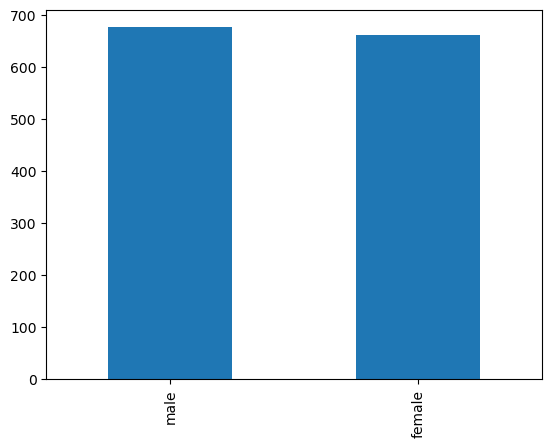

In [6]:
df['sex'].value_counts().sort_values(ascending=False).plot(kind='bar')

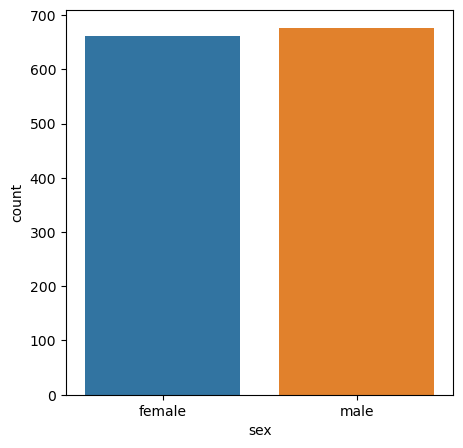

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=df)
plt.show()

In [8]:
df['children'].value_counts().sort_values(ascending=False)

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [9]:
df['smoker'].value_counts().sort_values(ascending=False)

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df['region'].value_counts().sort_values(ascending=False)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

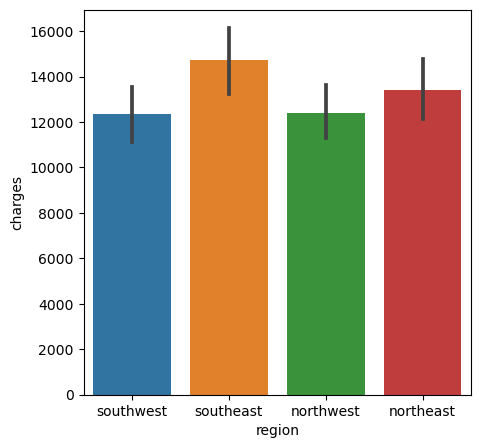

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='region',y='charges',data=df)
plt.show()

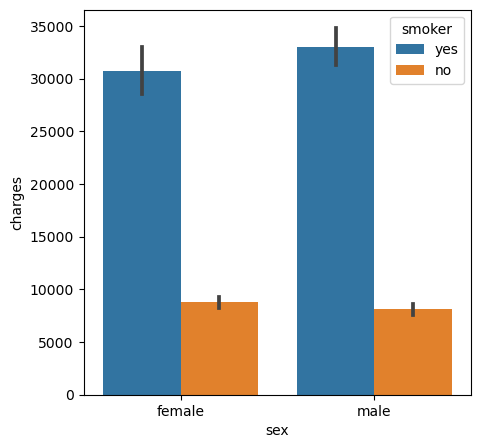

In [12]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex',y='charges',data=df,hue='smoker')
plt.show()

In [13]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


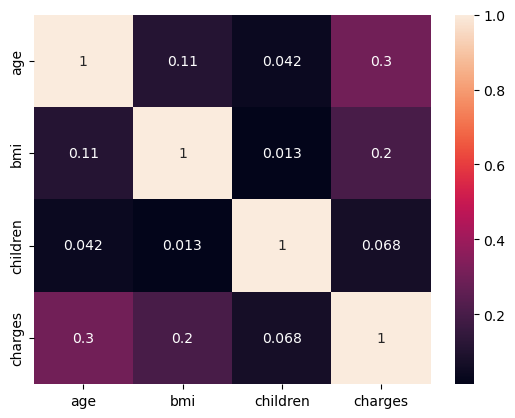

In [14]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [17]:
cata_cols=[i for i in df.columns if df[i].dtype=='O']
cata_cols

['sex', 'smoker', 'region']

In [18]:
df.replace({
    'sex': {
        'female':0,
       'male':1
    }
},inplace=True)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [20]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['smoker']=LE.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [21]:
df=pd.get_dummies(df,drop_first=True,prefix='IS')

In [22]:
df

,age,sex,bmi,children,smoker,charges,IS_northwest,IS_southeast,IS_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [23]:
X=df.drop('charges',axis=1)
y=df['charges']

In [24]:
X

,age,sex,bmi,children,smoker,IS_northwest,IS_southeast,IS_southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [25]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
X_train

,age,sex,bmi,children,smoker,IS_northwest,IS_southeast,IS_southwest
332,61,0,31.160,0,0,1,0,0
355,46,1,27.600,0,0,0,0,1
138,54,0,31.900,3,0,0,1,0
381,55,1,30.685,0,1,0,0,0
292,25,1,45.540,2,1,0,1,0
...,...,...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0,0,0
1130,39,0,23.870,5,0,0,1,0
1294,58,1,25.175,0,0,0,0,0
860,37,0,47.600,2,1,0,0,1


In [28]:
X_test

,age,sex,bmi,children,smoker,IS_northwest,IS_southeast,IS_southwest
764,45,0,25.175,2,0,0,0,0
887,36,0,30.020,0,0,1,0,0
890,64,0,26.885,0,1,1,0,0
1293,46,1,25.745,3,0,1,0,0
259,19,1,31.920,0,1,1,0,0
...,...,...,...,...,...,...,...,...
701,50,0,44.745,0,0,0,0,0
672,36,1,29.700,0,0,0,1,0
1163,18,0,28.215,0,0,0,0,0
1103,58,1,36.080,0,0,0,1,0


In [30]:
from sklearn.preprocessing import StandardScaler
ST=StandardScaler()
X_train=ST.fit_transform(X_train)
X_test=ST.transform(X_test)

In [31]:
X_train

array([[ 1.54446486, -1.02597835,  0.10318223, ...,  1.75708174,
        -0.59380229, -0.55760593],
       [ 0.48187425,  0.97467943, -0.4908445 , ..., -0.56912549,
        -0.59380229,  1.79338122],
       [ 1.04858924, -1.02597835,  0.2266597 , ..., -0.56912549,
         1.68406222, -0.55760593],
       ...,
       [ 1.33194673,  0.97467943, -0.8954835 , ..., -0.56912549,
        -0.59380229, -0.55760593],
       [-0.15568012, -1.02597835,  2.84638435, ..., -0.56912549,
        -0.59380229,  1.79338122],
       [ 1.11942861,  0.97467943, -0.10706319, ..., -0.56912549,
        -0.59380229,  1.79338122]])

In [33]:
X_train.std()

1.0

In [34]:
X_train.mean()

5.669728694132743e-17

In [35]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [36]:
LR.intercept_

13379.157306773504

In [37]:
LR.coef_

array([3688.58318998,   52.38868121, 2090.99783407,  514.02360356,
       9595.8681675 , -209.32555139, -426.26277109, -394.01444936])

In [38]:
y_pred=LR.predict(X_test)
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  